Before starting this notebook up, please do the following so that everything functions well: 
1. Install a virtual env by running the following in the command line:
``` Python
python -m venv venv
```

2. Install packages using pip via command line:
``` Python
pip install -r requirements.txt
```

In [94]:
import requests
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import product
from tqdm import tqdm
import pyarrow

In [58]:
def extract_nd_monthlies(choose_year: int, choose_month: int):
    """
    Given a year and month, extract and save MPR dataset
    Args: Month and Year lists
    Output: datframe with selected datasets months
    """
    # make sure that month is ##
    url = f"https://www.dmr.nd.gov/oilgas/mpr/{choose_year}_{choose_month:02d}.xlsx"

    response = requests.get(url=url)
    dataframe = pd.read_excel(response.content, header=0)

    # setting up process to store data
    current_dir = os.getcwd()
    save_path = f"{current_dir}/mpr_data/monthlies"
    os.makedirs(save_path, exist_ok=True)
    dataframe.to_excel(f"{save_path}/{choose_year}_{choose_month}.xlsx", index=False)

    return dataframe


In [64]:
def extract_mpr(start_yr: int = 2003, end_yr: int = 2026):
    """
    Function that tries to grab datasets and update master dataset 
    """
    datasets = []

    choose_years = list(range(start_yr, end_yr))
    choose_months = list(range(1, 13))
    date_permus = list(product(choose_years, choose_months))

    for date_permu in tqdm(date_permus): 
        try:
            temp_df = extract_nd_monthlies(choose_year=date_permu[0], choose_month=date_permu[1])
            datasets.append(temp_df)

        except:
            print(f"no data exists for {date_permu[0]}_{date_permu[1]}!")

    # now we want to combine all datasets into one master df
    master_df = pd.concat(datasets)

    # setting up where we wil be storing this dataset
    current_dir = os.getcwd()
    save_path = f"{current_dir}/mpr_data"
    os.makedirs(save_path, exist_ok=True)
    master_df.to_excel(f"{save_path}/full_data_{start_yr}_{end_yr}.xlsx", index=False)
    master_df = master_df.reset_index()

    return master_df



In [109]:
test_df = extract_mpr(start_yr=2021)

  0%|          | 0/60 [00:00<?, ?it/s]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_30858/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(response.content, header=0)
  2%|▏         | 1/60 [00:03<03:38,  3.71s/it]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_30858/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(response.content, header=0)
  3%|▎         | 2/60 [00:07<03:34,  3.69s/it]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_30858/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(respons

no data exists for 2025_5!
no data exists for 2025_6!


 92%|█████████▏| 55/60 [03:49<00:09,  1.80s/it]

no data exists for 2025_7!


 93%|█████████▎| 56/60 [03:49<00:05,  1.33s/it]

no data exists for 2025_8!


 95%|█████████▌| 57/60 [03:49<00:03,  1.03s/it]

no data exists for 2025_9!


 97%|█████████▋| 58/60 [03:50<00:01,  1.23it/s]

no data exists for 2025_10!


 98%|█████████▊| 59/60 [03:50<00:00,  1.44it/s]

no data exists for 2025_11!


100%|██████████| 60/60 [03:50<00:00,  3.84s/it]

no data exists for 2025_12!


We have successfully create extraction functions in two parts
- Single Extraction function given a month and year
- Multiple Extraction function given a start and end year

Let's visualize our data and create some visualizing functions!

In [110]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044456 entries, 0 to 1044455
Data columns (total 22 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   index       1044456 non-null  int64         
 1   ReportDate  1044456 non-null  datetime64[ns]
 2   API_WELLNO  1044456 non-null  int64         
 3   FileNo      1044456 non-null  int64         
 4   Company     1044456 non-null  object        
 5   WellName    1044456 non-null  object        
 6   Quarter     1044240 non-null  object        
 7   Section     1044456 non-null  int64         
 8   Township    1044456 non-null  int64         
 9   Range       1044456 non-null  int64         
 10  County      1044456 non-null  object        
 11  FieldName   1044456 non-null  object        
 12  Pool        1044456 non-null  object        
 13  Oil         1038761 non-null  float64       
 14  Wtr         1038761 non-null  float64       
 15  Days        1038761 non-null  fl

In [111]:
print(test_df.head(10))

   index ReportDate      API_WELLNO  FileNo            Company  \
0      0 2021-01-01  33053050010000   25645  EQUINOR ENERGY LP   
1      1 2021-01-01  33053050000000   25644  EQUINOR ENERGY LP   
2      2 2021-01-01  33053039010000   22023  EQUINOR ENERGY LP   
3      3 2021-01-01  33053038990000   22021  EQUINOR ENERGY LP   
4      4 2021-01-01  33053048330000   25091  EQUINOR ENERGY LP   
5      5 2021-01-01  33053048340000   25092  EQUINOR ENERGY LP   
6      6 2021-01-01  33053076280000   32709  EQUINOR ENERGY LP   
7      7 2021-01-01  33053042400000   23320  EQUINOR ENERGY LP   
8      8 2021-01-01  33053042390000   23319  EQUINOR ENERGY LP   
9      9 2021-01-01  33053042370000   23301  EQUINOR ENERGY LP   

                 WellName Quarter  Section  Township  Range  ...    Pool  \
0        BILL  14-23 4TFH    NWNE       14       151    101  ...  BAKKEN   
1          BILL  14-23 6H    NWNE       14       151    101  ...  BAKKEN   
2          BILL 14-23  1H    SWSW       11   

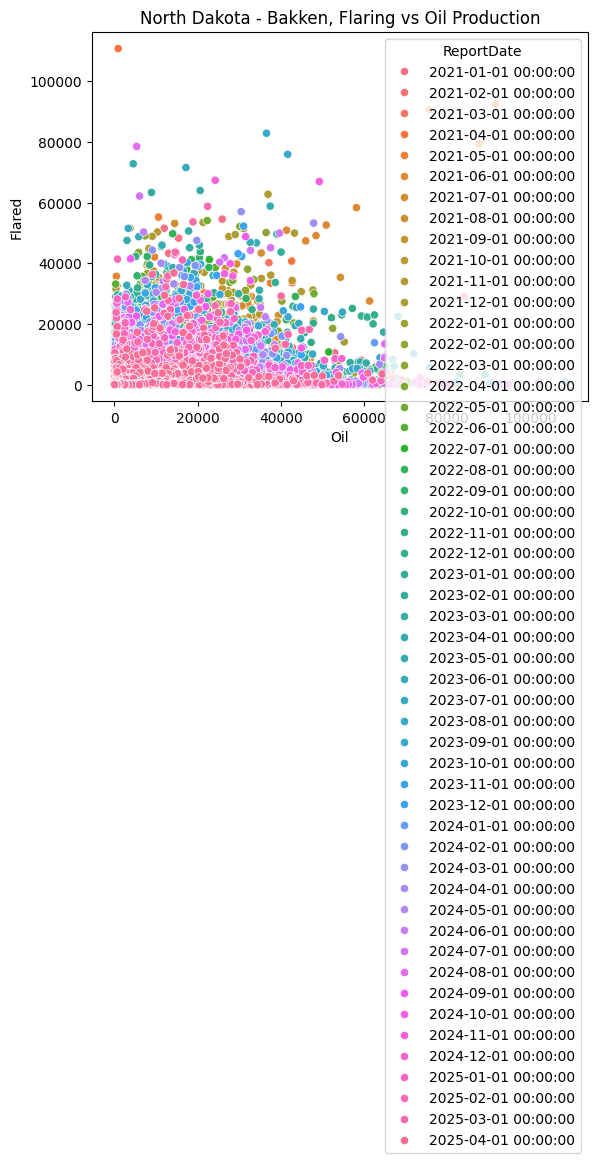

In [113]:
plt.figure()
sns.scatterplot(data=test_df, x="Oil", y="Flared", hue="ReportDate")
plt.title("North Dakota - Bakken, Flaring vs Oil Production")
plt.show()

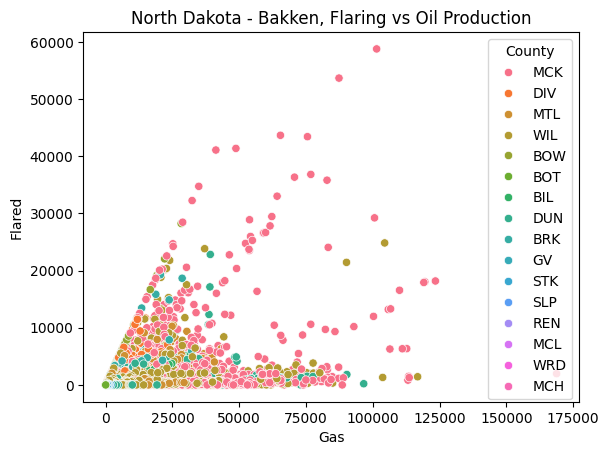

In [ ]:
plt.figure()
sns.scatterplot(data=test_df, x="Gas", y="Flared", hue="ReportDate")
plt.title("North Dakota - Bakken, Flaring vs Oil Production")
plt.show()

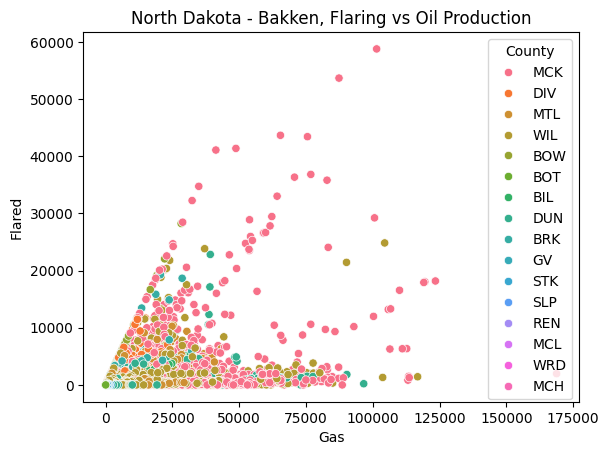

In [99]:
plt.figure()
sns.scatterplot(data=test_df, x="Gas", y="Flared", hue="County")
plt.title("North Dakota - Bakken, Flaring vs Oil Production")
plt.show()

After some visuals we have some direction! 
Let's now create a transformation function that can add a few columns with calculations we may want
One thing to note, we will be converting our dataset into a polars dataframe to ensure that we can apply functions in parallel (cols, etc.)

In [100]:
def transform_mpr(dataframe: object, ):
    """
    Given a dataframe, transform as necessary for additional metrics
    Args; DataFrame
    Output: Upgraded DataFrame (8!)
    """
    try: 
        pl_df = pl.from_pandas(dataframe)
    except: 
        print("Polars Dataframe already provided, gracias!")

    # we want to calculate 
    pl_df = pl_df.with_columns(
        water_cut = pl.col("Wtr") / (pl.col("Wtr") + pl.col("Oil")), 
        flare_intensity = pl.col("Flared") / pl.col("Gas"), 
        gas_util_efficiency = pl.col("GasSold") / pl.col("Gas")
    )

    return pl_df

In [103]:
test_tdf = transform_mpr(dataframe=test_df)
print(test_tdf.describe())

shape: (9, 26)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ index     ┆ ReportDat ┆ API_WELLN ┆ … ┆ Long      ┆ water_cut ┆ flare_int ┆ gas_util │
│ ---       ┆ ---       ┆ e         ┆ O         ┆   ┆ ---       ┆ ---       ┆ ensity    ┆ _efficie │
│ str       ┆ f64       ┆ ---       ┆ ---       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ncy      │
│           ┆           ┆ str       ┆ f64       ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 86190.0   ┆ 86190     ┆ 86190.0   ┆ … ┆ 86190.0   ┆ 85576.0   ┆ 85576.0   ┆ 85576.0  │
│ null_coun ┆ 0.0       ┆ 0         ┆ 0.0       ┆ … ┆ 0.0       ┆ 614.0     ┆ 614.0     ┆ 614.0    │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           

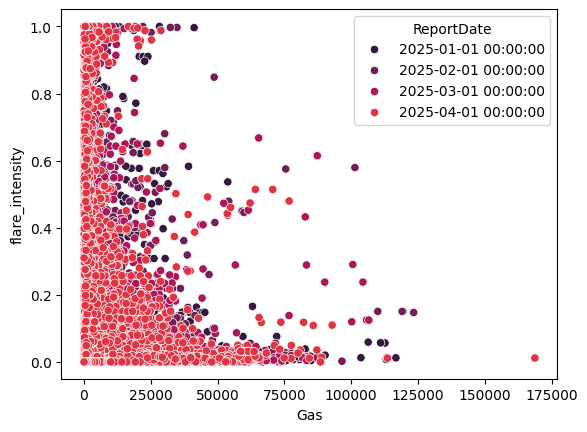

In [107]:
plt.figure()
sns.scatterplot(data=test_tdf, x="Gas", y="flare_intensity", hue='ReportDate')
plt.show()